# 💡 Getting Started

In this tutorial, you can see how to use `euclidlib` and get familiar with the internal python format.

In [1]:
# import euclidlib, we reccomend the alias `el`
import euclidlib as el

## Reading data
Let's read an example of the photometric angular power spectra data, $C_{\ell}$, in the Euclid Consortium Science Ground Segment (SGS) Level 3 (LE3) format. 

You can find a description of all the SGS products at the [Euclid SGS Data Product Description Document](https://euclid.esac.esa.int/msp/dpdd/live/index.html).

In [2]:
path_to_data = "../tests/photo/data/"
# In this example, the name of the file is 'angular_power_spectra.fits.gz'
cls = el.photo.angular_power_spectra(
    path_to_data + "example-angular_power_spectra.fits.gz"
)

In [3]:
# What is the format of the returned python object?
print(type(cls))

<class 'dict'>


In [4]:
# What is the format of the returned python object?
print(cls.keys())

dict_keys([('POS', 'POS', 1, 1), ('POS', 'SHE_E', 1, 1), ('POS', 'SHE_B', 1, 1), ('POS', 'POS', 1, 2), ('POS', 'SHE_E', 1, 2), ('POS', 'SHE_B', 1, 2), ('POS', 'POS', 1, 3), ('POS', 'SHE_E', 1, 3), ('POS', 'SHE_B', 1, 3), ('POS', 'POS', 1, 4), ('POS', 'SHE_E', 1, 4), ('POS', 'SHE_B', 1, 4), ('POS', 'POS', 1, 5), ('POS', 'SHE_E', 1, 5), ('POS', 'SHE_B', 1, 5), ('POS', 'POS', 1, 6), ('POS', 'SHE_E', 1, 6), ('POS', 'SHE_B', 1, 6), ('SHE_E', 'SHE_E', 1, 1), ('SHE_E', 'SHE_B', 1, 1), ('POS', 'SHE_E', 2, 1), ('SHE_E', 'SHE_E', 1, 2), ('SHE_E', 'SHE_B', 1, 2), ('POS', 'SHE_E', 3, 1), ('SHE_E', 'SHE_E', 1, 3), ('SHE_E', 'SHE_B', 1, 3), ('POS', 'SHE_E', 4, 1), ('SHE_E', 'SHE_E', 1, 4), ('SHE_E', 'SHE_B', 1, 4), ('POS', 'SHE_E', 5, 1), ('SHE_E', 'SHE_E', 1, 5), ('SHE_E', 'SHE_B', 1, 5), ('POS', 'SHE_E', 6, 1), ('SHE_E', 'SHE_E', 1, 6), ('SHE_E', 'SHE_B', 1, 6), ('SHE_B', 'SHE_B', 1, 1), ('POS', 'SHE_B', 2, 1), ('SHE_E', 'SHE_B', 2, 1), ('SHE_B', 'SHE_B', 1, 2), ('POS', 'SHE_B', 3, 1), ('SHE_E', '

### Understanding `euclidlib` internal python dictionary format

To store in python-native the read products, `euclidlib` uses python dictionaries with tuples as keys. 
In Python, dictionaries are data structures that store key-value pairs. Typically, dictionary keys are simple types like strings or numbers. However, Python allows more complex data types, like tuples, to be used as dictionary keys. 

A tuple is an ordered, immutable and unique collection of items. When a tuple is used as a dictionary key, the entire tuple is considered as a single key. The dictionary will use this tuple to map to a corresponding value. 

Here's an example of a dictionary that uses a tuple as a key:

```python
my_dict = {
    ('tracer_1', 'tracer_2', 1, 1): np.array(...),
}
```

In `euclidlib`, we use tuples to define the observable tracer and the redshift bin dependency such as:

- `'tracer_1'` and `'tracer_2'` can refer to lenses, sources...
- `1, 1` refers to the selected redshift bins 
- `np.array(...)` is the data 

The data is usually a structured NumPy array. This is a special kind of array in the NumPy library that allows you to store data with different types. Structured arrays enable you to organize and access your data with meaningful names and datatypes. 

In [5]:
# Let's access the dictionary entry corresponding
# to the key for the angular clustering data for the redshift bin 0
cls[("POS", "POS", 1, 1)].dtype

dtype([('L', '>f8'), ('CL', '>f8'), ('LMIN', '>f8'), ('LMAX', '>f8'), ('W', '>f8')])

The python dictionary entry corresponding to the key tuple `('POS', 'POS', 1, 1)` contains a NumPy structured array with names `'L'` (multipoles), `'CL'` (angular power spectra), and binning schema `'LMIN'`, `'LMAX'` and `'W'`.

### Plotting data products 

Below you can find some examples of how to plot Euclid data products

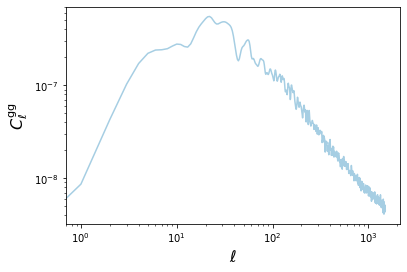

In [10]:
# Plot the corresponding angular power spectrum
# In this example, we are plotting the galaxy-galaxy angular power spectrum
import matplotlib.pyplot as plt

plt.loglog(cls[("POS", "POS", 1, 1)]["L"], cls[("POS", "POS", 1, 1)]["CL"])
plt.xlabel(r"$\ell$", fontsize=16)
plt.ylabel(r"$C^{\rm gg}_\ell$", fontsize=16);

(0.0, 3.0)

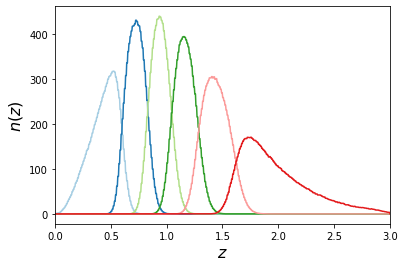

In [11]:
# you can also read other products,
# such as the galaxy redshift bin distribution n(z)
z, nz = el.photo.redshift_distributions(
    path_to_data + "example-redshift_bin_distribution.fits"
)
for bin in range(1, len(nz) + 1):
    plt.plot(z, nz[bin])
plt.xlabel(r"$z$", fontsize=16)
plt.ylabel(r"$n(z)$", fontsize=16)
plt.xlim(0, 3.0);